In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

First, we load in our dataset

In [85]:
df = pd. read_csv('/Users/sabrinasayed/Documents/Flatiron/Phase 1/Phase 1 Project/Phase-1-Project/Data/AviationData.csv', encoding = 'latin1', low_memory = False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Let's clean up any unnecessary punctuation, spaces, and fix capitalization for column names.

In [87]:
#Replace periods in all the column names
df.columns = df.columns.str.replace('.', ' ', regex=False)

In [88]:
#Fixing the capitalization for column names
df.columns = df.columns.str.title()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                88889 non-null  object 
 1   Investigation Type      88889 non-null  object 
 2   Accident Number         88889 non-null  object 
 3   Event Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport Code            50249 non-null  object 
 9   Airport Name            52790 non-null  object 
 10  Injury Severity         87889 non-null  object 
 11  Aircraft Damage         85695 non-null  object 
 12  Aircraft Category       32287 non-null  object 
 13  Registration Number     87572 non-null  object 
 14  Make                    88826 non-null

Let's start exploring each column to identify any duplicate values, missing values, and unnecessary columns/rows.

In [91]:
df['Weather Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather Condition, dtype: int64

In [92]:
#There are two columns for unknowns. Let's consolidate into one.
df['Weather Condition'] = df['Weather Condition'].str.replace('Unk','UNK')

In [93]:
df['Weather Condition'].value_counts()

VMC    77303
IMC     5976
UNK     1118
Name: Weather Condition, dtype: int64

In [94]:
# The publication date for these reports are not useful to us. The event date 
## is enough for us to track the times of these accidents.
df = df.drop('Publication Date', axis = 1)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                88889 non-null  object 
 1   Investigation Type      88889 non-null  object 
 2   Accident Number         88889 non-null  object 
 3   Event Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport Code            50249 non-null  object 
 9   Airport Name            52790 non-null  object 
 10  Injury Severity         87889 non-null  object 
 11  Aircraft Damage         85695 non-null  object 
 12  Aircraft Category       32287 non-null  object 
 13  Registration Number     87572 non-null  object 
 14  Make                    88826 non-null

In [96]:
df['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [97]:
# Since the schedule status for flights does not contribute anyway to safety
## of flights we can drop this column.

df = df.drop('Schedule', axis = 1)

In [98]:
#We will be focusing on the make and model of each plane so we can do without
#   knowing the Air Carriers.

df = df.drop('Air Carrier', axis = 1)

In [99]:
# There's more missing values than existing values for the Latitude and Longitude columns
## Since we have the cities, countries, and airports to pinpoint locations of flights,
### let's get ride of these 2 columns.

df['Latitude'].isna().value_counts()
df['Longitude'].isna().value_counts()

True     54516
False    34373
Name: Longitude, dtype: int64

In [100]:
df = df.drop('Latitude', axis=1)
df = df.drop('Longitude', axis=1)

In [101]:
# Amateur Built aircrafts are homebuilt aircrafts or kit planes constructed by
## individuals for personal use or education rather than professional activity.
### We only want professionaly built aircrafts for our purposes, so we can get rid of any
#### aircrafts that are Amateur Built.

df = df.drop(df[df['Amateur Built'] == 'Yes'].index)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80414 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                80414 non-null  object 
 1   Investigation Type      80414 non-null  object 
 2   Accident Number         80414 non-null  object 
 3   Event Date              80414 non-null  object 
 4   Location                80363 non-null  object 
 5   Country                 80194 non-null  object 
 6   Airport Code            45083 non-null  object 
 7   Airport Name            47411 non-null  object 
 8   Injury Severity         79415 non-null  object 
 9   Aircraft Damage         77249 non-null  object 
 10  Aircraft Category       28740 non-null  object 
 11  Registration Number     79134 non-null  object 
 12  Make                    80366 non-null  object 
 13  Model                   80345 non-null  object 
 14  Amateur Built           80312 non-null

In [103]:
df['Engine Type'].value_counts()

Reciprocating      61664
Turbo Shaft         3581
Turbo Prop          3314
Turbo Fan           2474
Unknown             1901
Turbo Jet            690
None                  18
Geared Turbofan       12
Electric              10
LR                     2
UNK                    1
NONE                   1
Hybrid Rocket          1
Name: Engine Type, dtype: int64

Let's take a deep dive into these engine types to figure out which engines are suitable for our corporate and business aviation purposes.

1. Reciprocating (a.k.a. piston) engines are used for general aviation because they're affordable, robust, and have good fuel efficiency. They're also used for corporate aviation and are best for flying at lower altitudes. **We'll keep this one!**

2. Turbo Shaft engines are used in helicopters and large commercial aircrafts. **We'll keep this!**

3. Turbo Prop engines are a hybrid of piston and jet ingines that are used in light aircrafts. They're known for their fuel efficiency on short and medium-haul flights. They offer good performance at low altitudes and speeds, and are ideal fo take-off and landing operations at smaller airports. **We'll keep this!**

4. Turbofan engines are commonly used in corporate aircrafts including light to mid-size business jets, and are generally popular for commercial aircrafts. They are known for being compact and fuel efficient. **We'll keep this!**

5. Turbo Jet engines are commonly used in commercial aircrafts and private jets. They are capable of high speeds and take up little space. **We'll keep this!**

6. Geared Turbo Fans are commonly used in commercial aircrafts, a sub-type of Turbofan engines. They are efficient with smaller and faster tubrines. **We'll keep this!**

7. LR engines, or long range engines, are developed for ultra-long-haul routes such as from L.A. to Singapore. This will be useful for our executives. **We'll keep this!**

8. Electric engines are relatively newer to the industry and are mainly used for training flights. They're not yet a common use for the commercial industry though many companies are working on and investing in building these aircrafts. We can drop these values and luckily there's only 10 values to drop. 

9. Hybrid rocket engines are used in rockets, so for obvious reasons we can drop that.

In [105]:
df.drop(df[df['Engine Type'] == 'Hybrid Rocket'].index, inplace = True)
df.drop(df[df['Engine Type'] == 'Electric'].index, inplace = True)

df['Engine Type'].value_counts()

Reciprocating      61664
Turbo Shaft         3581
Turbo Prop          3314
Turbo Fan           2474
Unknown             1901
Turbo Jet            690
None                  18
Geared Turbofan       12
LR                     2
UNK                    1
NONE                   1
Name: Engine Type, dtype: int64

Now let's consolidate the unknown values.

In [107]:
df['Engine Type'] = df['Engine Type'].str.replace('UNK', 'Unknown')
df['Engine Type'] = df['Engine Type'].str.replace('NONE', 'Unknown')
df['Engine Type'] = df['Engine Type'].str.replace('None', 'Unknown')
df['Engine Type'].value_counts()

Reciprocating      61664
Turbo Shaft         3581
Turbo Prop          3314
Turbo Fan           2474
Unknown             1921
Turbo Jet            690
Geared Turbofan       12
LR                     2
Name: Engine Type, dtype: int64

In [108]:
# Let's replace the missing values as Unknown.
df['Engine Type'].isna().value_counts()


False    73658
True      6745
Name: Engine Type, dtype: int64

In [109]:
df['Engine Type'] = df['Engine Type'].fillna('Unknown')
df['Engine Type'].value_counts()

Reciprocating      61664
Unknown             8666
Turbo Shaft         3581
Turbo Prop          3314
Turbo Fan           2474
Turbo Jet            690
Geared Turbofan       12
LR                     2
Name: Engine Type, dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80403 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                80403 non-null  object 
 1   Investigation Type      80403 non-null  object 
 2   Accident Number         80403 non-null  object 
 3   Event Date              80403 non-null  object 
 4   Location                80352 non-null  object 
 5   Country                 80183 non-null  object 
 6   Airport Code            45078 non-null  object 
 7   Airport Name            47405 non-null  object 
 8   Injury Severity         79406 non-null  object 
 9   Aircraft Damage         77238 non-null  object 
 10  Aircraft Category       28729 non-null  object 
 11  Registration Number     79123 non-null  object 
 12  Make                    80355 non-null  object 
 13  Model                   80334 non-null  object 
 14  Amateur Built           80301 non-null

In [111]:
# We won't need the airport codes since we have airport names.
df.drop('Airport Code', axis=1, inplace = True)

In [112]:
# Let's replace missing Location value as Unknown.
df['Location'].isna().value_counts()
df['Location'] = df['Location'].fillna('Unknown')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80403 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                80403 non-null  object 
 1   Investigation Type      80403 non-null  object 
 2   Accident Number         80403 non-null  object 
 3   Event Date              80403 non-null  object 
 4   Location                80403 non-null  object 
 5   Country                 80183 non-null  object 
 6   Airport Name            47405 non-null  object 
 7   Injury Severity         79406 non-null  object 
 8   Aircraft Damage         77238 non-null  object 
 9   Aircraft Category       28729 non-null  object 
 10  Registration Number     79123 non-null  object 
 11  Make                    80355 non-null  object 
 12  Model                   80334 non-null  object 
 13  Amateur Built           80301 non-null  object 
 14  Number Of Engines       74617 non-null

In [114]:
# Let's replace any missing Country values with Unknown
df['Country'] = df['Country'].fillna('Unknown')
df['Country'].value_counts()

United States     73916
Brazil              369
Mexico              348
Canada              347
United Kingdom      336
                  ...  
Eritrea               1
Belarus               1
Albania               1
Malampa               1
Palau                 1
Name: Country, Length: 218, dtype: int64

In [115]:
# It looks like Country column has a skewed representation of data because the U.S. represents more than 90% of the data. 
## We can make a separate dataframe that solely includes U.S. called df_us to do analyses on specific incidents in the U.S.

df_us = df[df['Country'] == 'United States']

In [116]:
# Event Date values are currently an object type, let's transform them into datetime types
df['Event Date'] = pd.to_datetime(df['Event Date'])

In [117]:
# Injury Severity has Fatal values with different names. Let's rename any values that 
# start with Fatal to just be called 'Fatal'.

df['Injury Severity'] = df['Injury Severity'].apply(lambda x: 'Fatal' if 'Fatal' in str(x) else x)

In [118]:
# Injury Severity has missing values with different names, let's call them all 'Unavailable'.
df['Injury Severity'].fillna('Unavailable', inplace=True)
df['Injury Severity'].value_counts()


Fatal          76773
Incident        2194
Unavailable     1087
Minor            196
Serious          153
Name: Injury Severity, dtype: int64

In [119]:
# There are many types of aircrafts but for our intents and purposes we only want to see airplanes, so let's remove anything that isn't an airplane.
df['Aircraft Category'].value_counts()


Airplane             24429
Helicopter            3295
Glider                 473
Balloon                229
Weight-Shift           139
Powered Parachute       83
Gyrocraft               32
Ultralight              18
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Name: Aircraft Category, dtype: int64

In [120]:
df = df.drop(df[(df['Aircraft Category'] != 'Airplane')].index)

In [121]:
# Let's look at our overall info ans see what else is left.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24429 entries, 5 to 88886
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                24429 non-null  object        
 1   Investigation Type      24429 non-null  object        
 2   Accident Number         24429 non-null  object        
 3   Event Date              24429 non-null  datetime64[ns]
 4   Location                24429 non-null  object        
 5   Country                 24429 non-null  object        
 6   Airport Name            16011 non-null  object        
 7   Injury Severity         24429 non-null  object        
 8   Aircraft Damage         23155 non-null  object        
 9   Aircraft Category       24429 non-null  object        
 10  Registration Number     24216 non-null  object        
 11  Make                    24426 non-null  object        
 12  Model                   24411 non-null  object

In [122]:
# Aircraft Damage has  138 missing values, lets drop them since there's too few to affect our analysis.

df['Aircraft Damage'].value_counts()
df['Aircraft Damage'].isna().value_counts()
df['Aircraft Damage'] = df['Aircraft Damage'].fillna('Unknown')
df = df.drop(df[df['Aircraft Damage'] == 'Unknown'].index)
df['Aircraft Damage'].value_counts()


Substantial    18981
Destroyed       3146
Minor            931
Name: Aircraft Damage, dtype: int64

In [123]:
# Let's look into the Purpose of Flight column.
## Let's get rid of the values that won't be useful to us for business and corporate travel
df['Purpose Of Flight'].value_counts()


Personal                     13258
Instructional                 3088
Aerial Application            1063
Unknown                        770
Business                       749
Positioning                    333
Aerial Observation             169
Skydiving                      162
Ferry                          162
Other Work Use                 151
Executive/corporate            140
Flight Test                    114
Banner Tow                      89
Public Aircraft - Federal       51
Air Race show                   45
Public Aircraft                 40
Glider Tow                      35
Public Aircraft - State         24
Firefighting                    16
Public Aircraft - Local         12
ASHO                             5
Air Race/show                    4
Air Drop                         3
PUBS                             3
Name: Purpose Of Flight, dtype: int64

In [124]:
df = df.drop(df[(df['Purpose Of Flight'] != 'Personal') & (df['Purpose Of Flight'] != 'Aerial Application') & (df['Purpose Of Flight'] != 'Instructional') & (df['Purpose Of Flight'] != 'Unknown') & (df['Purpose Of Flight'] != 'Business') & (df['Purpose Of Flight'] != 'Positioning') & (df['Purpose Of Flight'] != 'Executive/corporate') & (df['Purpose Of Flight'] != 'Flight Test') & (df['Purpose Of Flight'] != 'Other Work Use') & (df['Purpose Of Flight'] != 'Public Aircraft - State') & (df['Purpose Of Flight'] != 'Ferry') & (df['Purpose Of Flight'] != 'Public Aircraft') & (df['Purpose Of Flight'] != 'Public Aircraft - Local')].index)

In [125]:
# We'll get rid of registration number since that won't be useful to our analysis
df = df.drop(['Registration Number'], axis =1)

In [126]:
# Models has some missing values that we'll drop since there aren't many and have unknown Models will not be helpful in offering a final recommendation.
df['Model'].isna().value_counts()
df.dropna(subset= ['Model'], inplace=True)

In [127]:
df['Model'].isna().value_counts()

False    19896
Name: Model, dtype: int64

In [128]:
# We need to clean up the Make column to get rid of duplicate Make types caused by different cases and white space.
df['Make'].value_counts()
df['Make'] = df['Make'].replace('CESSNA', 'Cessna')
df['Make'] = df['Make'].replace('PIPER', 'Piper')
df['Make'] = df['Make'].replace('BEECH', 'Beech')
df['Make'] = df['Make'].str.strip(' ')
df[['Make', 'Model']].value_counts()
df['Make'] = df['Make'].str.title()
df['Make'].value_counts()

#Let's also drop any missing values in this column
df.dropna(subset= ['Make'], inplace=True)



In [129]:
df['Make'].isna().value_counts()


False    19896
Name: Make, dtype: int64

In [130]:
df['Number Of Engines'].isna().value_counts()

False    19160
True       736
Name: Number Of Engines, dtype: int64

<AxesSubplot:xlabel='Make', ylabel='Total Fatal Injuries'>

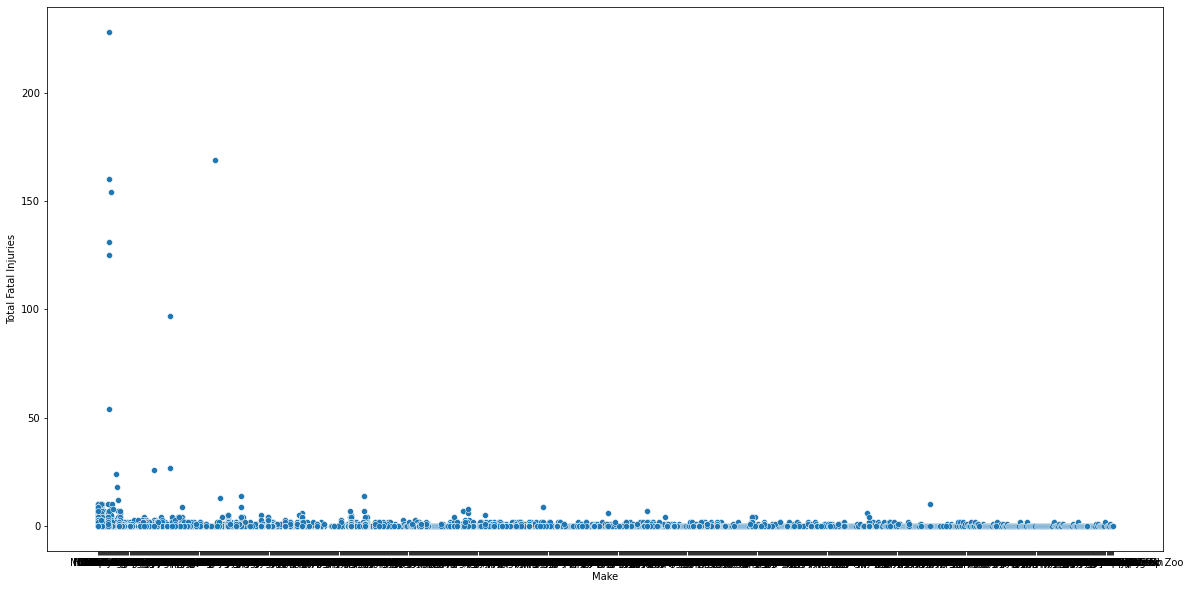

In [131]:
# I wanted to see what the relationship between Total Fatal Injuries and Make looks like.
## This scatter plot shows that there's almost too many Makes to be able to distinguish any type of pattern
### It seems it will be important to cut down on unneccessary Makes and Models, and then create a Make-Model column
#### to have unique identifiers that will stand out and reveal more to us

fig, ax = plt.subplots(figsize = (20, 10))
sns.scatterplot(x = 'Make', y = 'Total Fatal Injuries', data = df, ax = ax)

Let's keep getting rid of missing values in the rest of the rest of the columns first before we continue cutting down Makes and Models.

In [133]:
# The mean, median, and mode for number of engines is about 1 per aircraft. Let's fill the missing values with the average.
df['Number Of Engines'].mean()
df['Number Of Engines'] = df['Number Of Engines'].fillna(df['Number Of Engines'].mean())
df['Number Of Engines'].isna().value_counts()

False    19896
Name: Number Of Engines, dtype: int64

In [134]:
# The mean of total fatal injuries is .04. Theres about 1000 missing values. Let's fill them in with the mean.
df['Total Fatal Injuries'].isna().value_counts()
df['Total Fatal Injuries'].mean()

0.44408045977011495

In [135]:
df['Total Fatal Injuries'] = df['Total Fatal Injuries'].fillna(df['Total Fatal Injuries'].mean())

In [136]:
# Theres some missing values here, lets forward fill to fill in the gaps.
df['Total Serious Injuries'].ffill(axis=0, inplace=True)
df['Total Serious Injuries'].isna().value_counts()

False    19896
Name: Total Serious Injuries, dtype: int64

In [137]:
df['Total Minor Injuries'].ffill(axis=0, inplace=True)
df['Total Minor Injuries'].isna().value_counts()

False    19896
Name: Total Minor Injuries, dtype: int64

In [138]:
# Let's fill in these missing values the same way
df['Total Uninjured'].ffill(axis=0,inplace=True)
df['Total Uninjured'].isna().value_counts()

False    19896
Name: Total Uninjured, dtype: int64

In [139]:
# We can calculate the number of Total Passengers in each incident by adding up the fatal injuries, serious injuries, minor injuries, and uninjured.
## This will be helpful when we want to build our risk index by calculating the ratio of fatalities and injuries for each make and model.
df['Total Passengers'] = df['Total Fatal Injuries'] + df['Total Minor Injuries'] + df['Total Serious Injuries'] + df['Total Uninjured']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19896 entries, 7 to 88886
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                19896 non-null  object        
 1   Investigation Type      19896 non-null  object        
 2   Accident Number         19896 non-null  object        
 3   Event Date              19896 non-null  datetime64[ns]
 4   Location                19896 non-null  object        
 5   Country                 19896 non-null  object        
 6   Airport Name            14100 non-null  object        
 7   Injury Severity         19896 non-null  object        
 8   Aircraft Damage         19896 non-null  object        
 9   Aircraft Category       19896 non-null  object        
 10  Make                    19896 non-null  object        
 11  Model                   19896 non-null  object        
 12  Amateur Built           19891 non-null  object

In [140]:
# I will also drop the Report Status since this information will not be helping us calculate the risk index  to measure safety or efficiency of engines
df.drop(['Report Status'], axis = 1, inplace=True)


In [141]:
# We will keep the Broad Phase of Flight column to see if there is specific when these accidents may occur, or not.
df['Broad Phase Of Flight'] = df['Broad Phase Of Flight'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19896 entries, 7 to 88886
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                19896 non-null  object        
 1   Investigation Type      19896 non-null  object        
 2   Accident Number         19896 non-null  object        
 3   Event Date              19896 non-null  datetime64[ns]
 4   Location                19896 non-null  object        
 5   Country                 19896 non-null  object        
 6   Airport Name            14100 non-null  object        
 7   Injury Severity         19896 non-null  object        
 8   Aircraft Damage         19896 non-null  object        
 9   Aircraft Category       19896 non-null  object        
 10  Make                    19896 non-null  object        
 11  Model                   19896 non-null  object        
 12  Amateur Built           19891 non-null  object

In [142]:
# Weather conditions will be interesitng to evaluate how they affect fatalities/injuries and how certain aircrafts perform in worse conditions
df['Weather Condition'].isna().value_counts()

False    19282
True       614
Name: Weather Condition, dtype: int64

In [143]:
# Let's fill in the missing values here
df['Weather Condition'].fillna('Unknown', axis=0, inplace=True)

In [144]:
# We'll do the same for airport Names.
df['Airport Name'] = df['Airport Name'].fillna('Unknown')

In [145]:
df.dropna(subset=['Amateur Built'], axis=0, inplace=True)

In [146]:
df['Amateur Built'].isna().value_counts()

False    19891
Name: Amateur Built, dtype: int64

We will drop any values with Total Passengers greater than 20 for our business purposes.

In [148]:
df =  df.drop(df[df['Total Passengers'] > 10].index)
(df['Total Passengers'] > 10).value_counts()


False    19684
Name: Total Passengers, dtype: int64

In [149]:
# Let's remove aircrafts with instructional and aerial application purpose of flight
## these aircrafts do not apply to our 
df_filtered = df[(df['Purpose Of Flight'] != 'Instructional') & (df['Purpose Of Flight'] != 'Public Aircraft') & (df['Purpose Of Flight'] != 'Aerial Application')]
df = df_filtered

In [150]:
# We can also get rid of the Personal flights because they seem to be unfit for corporate use
df['Purpose Of Flight'].value_counts()
df = df[df['Purpose Of Flight'] != 'Personal']

In [151]:
# Let's drop all of the makes and models that don't apply for our business purposes
df =  df.drop(df[(df['Make'] == 'Cessna') & (df['Model'] == '172')].index)
df =  df.drop(df[(df['Make'] == 'Cessna') & (df['Model'] == '152')].index)
df =  df.drop(df[(df['Make'] == 'Cessna') & (df['Model'] == '150')].index)
df =  df.drop(df[(df['Make'] == 'Cessna') & (df['Model'] == '172S')].index)
df =  df.drop(df[(df['Make'] == 'Cessna') & (df['Model'] == '172N')].index)


In [152]:
# Let's drop the make that only have one value counts
make_counts= df['Make'].value_counts()
df_filtered = df[df['Make'].isin(make_counts[make_counts > 1].index)]
df = df_filtered
df['Make'].value_counts() == 1
df['Make'].value_counts()

Cessna                      754
Piper                       422
Beech                       231
Grumman                      40
Mooney                       32
                           ... 
Mooney Aircraft Corp.         2
Short Bros                    2
Diamond Aircraft Ind Inc      2
Ercoupe                       2
Pipistrel                     2
Name: Make, Length: 102, dtype: int64

In [153]:
# The list below is a list of makes and models put together by CHatGPT
# that are not suited for our business purposes, so we will drop them
remove_list = [
    ("Cessna", "140"),
    ("Bellanca", "17-30A"),
    ("Cessna", "R172K"),
    ("Navion", "A"),
    ("Beech", "19"),
    ("Cessna", "180"),
    ("Cessna", "150L"),
    ("Piper", "PA-24-180"),
    ("Grumman", "AA-5B"),
    ("Beechcraft", "BE-58"),
    ("Maule", "M-5-235C"),
    ("Cessna", "210L"),
    ("Bellanca", "7GCBC"),
    ("Cessna", "182"),
    ("Air Tractor", "AT-301"),
    ("Piper", "PA-28-161"),
    ("Piper", "PA-34-200T"),
    ("Cessna", "T337G"),
    ("Piper", "PA-28R-200"),
    ("Piper", "PA-22")
]

remove_df = pd.DataFrame(remove_list, columns=['Make', 'Model'])
df_filtered = df[~df[['Make', 'Model']].apply(tuple, axis=1).isin(remove_list)]
df = df_filtered


In [154]:
# In order to make it easier to filter out the makes and models we don't need, 
# we need to combine them into one column.
df[['Make', 'Model']]
df['Make-Model'] = df['Make'] + ' ' + df['Model']
df['Make-Model']


8                    Cessna 401B
25                   Cessna 414A
36                    Cessna 206
39                   Piper PA-31
40                  Rockwell 114
                  ...           
88804                 Cessna 207
88822    Cirrus Design Corp SF50
88834             Learjet Inc 45
88836    Gates Lear Jet Corp. 36
88837                 Learjet 35
Name: Make-Model, Length: 1983, dtype: object

In [155]:
make_model_counts= df['Make-Model'].value_counts()
df2 = df[df['Make-Model'].isin(make_model_counts[make_model_counts > 1].index)]
df = df2

In [156]:
df['Make-Model'].value_counts()

Piper PA-31-350                  21
Cessna A185F                     20
Beech 58                         20
Cessna 207                       18
Piper PA-23-250                  18
                                 ..
Beech B95                         2
Air Tractor Inc AT-802A           2
Piper PA 31-350                   2
Dehavilland DHC-2 MK. I(L20A)     2
Beech E35                         2
Name: Make-Model, Length: 330, dtype: int64

In [157]:
df = df.drop(columns = ['Accident Number', 'Far Description', 'Event Id'], axis=1)

In [158]:
df.set_index('Event Date')

,Investigation Type,Location,Country,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,...,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Total Passengers,Make-Model
Event Date,,,,,,,,,,,,,,,,,,,,,
1982-01-03,Accident,"ASHLAND, VA",United States,HANOVER COUNTY,Fatal,Destroyed,Airplane,Cessna,414A,No,...,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,Approach,8.0,Cessna 414A
1982-01-04,Accident,SAINT CROIX,Unknown,ALEXANDER HAMILTON,Fatal,Destroyed,Airplane,Cessna,206,No,...,Reciprocating,Business,1.0,0.0,1.0,0.0,VMC,Taxi,2.0,Cessna 206
1982-01-05,Accident,"ITHACA, NY",United States,TOMPKINS COUNTY,Fatal,Destroyed,Airplane,Piper,PA-31,No,...,Reciprocating,Unknown,2.0,0.0,0.0,0.0,VMC,Approach,2.0,Piper PA-31
1982-01-05,Accident,"LONOKE, AR",United States,Unknown,Fatal,Substantial,Airplane,Piper,PA-24-250,No,...,Reciprocating,Business,0.0,1.0,0.0,1.0,VMC,Descent,2.0,Piper PA-24-250
1982-01-05,Accident,"SPRINGERVILLE, AZ",United States,SPRINGERVILLE,Fatal,Substantial,Airplane,Cessna,TR182,No,...,Reciprocating,Unknown,0.0,0.0,0.0,1.0,VMC,Taxi,1.0,Cessna TR182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18,Accident,"Decatur, TX",United States,Unknown,Fatal,Destroyed,Airplane,Cessna,421C,No,...,Unknown,Positioning,1.0,0.0,0.0,0.0,VMC,Unknown,1.0,Cessna 421C
2022-11-20,Accident,"Bethel, AK",United States,Unknown,Fatal,Substantial,Airplane,Cessna,207,No,...,Unknown,Business,0.0,0.0,0.0,7.0,VMC,Unknown,7.0,Cessna 207
2022-11-25,Accident,"Mount Comfort, IN",United States,INDIANAPOLIS RGNL,Fatal,Substantial,Airplane,Cirrus Design Corp,SF50,No,...,Unknown,Positioning,0.0,0.0,0.0,1.0,IMC,Unknown,1.0,Cirrus Design Corp SF50


In [159]:
df = df.drop(['Aircraft Category'], axis =1)

In [160]:
df

,Investigation Type,Event Date,Location,Country,Airport Name,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,...,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Total Passengers,Make-Model
25,Accident,1982-01-03,"ASHLAND, VA",United States,HANOVER COUNTY,Fatal,Destroyed,Cessna,414A,No,...,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,Approach,8.0,Cessna 414A
36,Accident,1982-01-04,SAINT CROIX,Unknown,ALEXANDER HAMILTON,Fatal,Destroyed,Cessna,206,No,...,Reciprocating,Business,1.0,0.0,1.0,0.0,VMC,Taxi,2.0,Cessna 206
39,Accident,1982-01-05,"ITHACA, NY",United States,TOMPKINS COUNTY,Fatal,Destroyed,Piper,PA-31,No,...,Reciprocating,Unknown,2.0,0.0,0.0,0.0,VMC,Approach,2.0,Piper PA-31
41,Accident,1982-01-05,"LONOKE, AR",United States,Unknown,Fatal,Substantial,Piper,PA-24-250,No,...,Reciprocating,Business,0.0,1.0,0.0,1.0,VMC,Descent,2.0,Piper PA-24-250
43,Accident,1982-01-05,"SPRINGERVILLE, AZ",United States,SPRINGERVILLE,Fatal,Substantial,Cessna,TR182,No,...,Reciprocating,Unknown,0.0,0.0,0.0,1.0,VMC,Taxi,1.0,Cessna TR182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,Accident,2022-11-18,"Decatur, TX",United States,Unknown,Fatal,Destroyed,Cessna,421C,No,...,Unknown,Positioning,1.0,0.0,0.0,0.0,VMC,Unknown,1.0,Cessna 421C
88804,Accident,2022-11-20,"Bethel, AK",United States,Unknown,Fatal,Substantial,Cessna,207,No,...,Unknown,Business,0.0,0.0,0.0,7.0,VMC,Unknown,7.0,Cessna 207
88822,Accident,2022-11-25,"Mount Comfort, IN",United States,INDIANAPOLIS RGNL,Fatal,Substantial,Cirrus Design Corp,SF50,No,...,Unknown,Positioning,0.0,0.0,0.0,1.0,IMC,Unknown,1.0,Cirrus Design Corp SF50
88836,Accident,2022-11-30,"Newport News, VA",United States,NEWPORT NEWS/WILLIAMSBURG INTL,Fatal,Substantial,Gates Lear Jet Corp.,36,No,...,Unknown,Other Work Use,0.0,0.0,0.0,3.0,VMC,Unknown,3.0,Gates Lear Jet Corp. 36


In [235]:
df.to_csv('Clean_Aviation_Data_Final.csv')